In [1]:
import random as rnd


class GeneticAlgorithms:
    def geneticAlgorithm(problem, population, fitnessFunction, mutationProbability=0.1, iterations=100):
        iteration = 0
        while True:
            iteration += 1

            newPopulation = []
            for i in range(0, len(population)):
                x = GeneticAlgorithms.roulleteSelection(population, fitnessFunction)
                y = GeneticAlgorithms.roulleteSelection(population, fitnessFunction)

                child = problem.reproduce(x, y)
                if rnd.random() < mutationProbability:
                    child = GeneticAlgorithms.mutate(child)

                # newPopulationLength = len(newPopulation)
                newPopulation.append(child)
                # newPopulation = np.reshape(newPopulation, (newPopulationLength+1, len(child)))

            population = newPopulation

            print([fitnessFunction(element) for element in population]) #! debug

            if iteration > iterations:
                break

        bestChild = GeneticAlgorithms.bestSelection(population, fitnessFunction)
        problem.printState(bestChild, 'Genetic Algorithm')
        # return bestChild

    def roulleteSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population

        chance = rnd.randint(0, sum([fitnessFunction(element) for element in population]))
        for element in population:
            chance -= fitnessFunction(element)
            if chance <= 0:
                return element

    def mutate(child):
        mutatedChild = child.copy()
        childLength = len(child)

        # Swap two random elements
        i = rnd.randint(0, childLength - 1)
        j = rnd.randint(0, childLength - 1)
        while i == j:
            j = rnd.randint(0, childLength - 1)

        mutatedChild[i], mutatedChild[j] = mutatedChild[j], mutatedChild[i]

        return mutatedChild

    def bestSelection(population: list, fitnessFunction):
        rnd.shuffle(population)  # Shuffle population
        return max(population, key=fitnessFunction)


[(0, 48), (17, 17), (14, 55), (99, 51), (92, 20)]


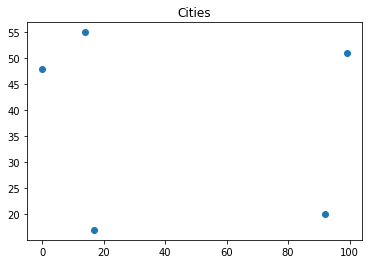

[276, 347, 253, 276, 276, 276, 343, 368, 387, 255, 387, 276, 383, 368, 409, 409, 262, 273, 383, 253, 383, 255, 253, 262, 383, 347, 387, 347, 347, 276, 276, 347, 383, 368, 347, 409, 368, 368, 276, 255, 273, 383, 343, 262, 253, 273, 383, 409, 387, 244, 343, 368, 343, 276, 343, 244, 347, 368, 262, 273, 409, 255, 244, 255, 409, 347, 347, 368, 409, 255, 255, 368, 387, 343, 244, 255, 255, 383, 276, 262, 347, 368, 255, 347, 262, 262, 387, 253, 262, 244, 409, 276, 383, 368, 368, 262, 409, 262, 347, 255]


In [2]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(5)
GeneticAlgorithms.geneticAlgorithm(ts, ts.population(), ts.fitnessFunction)


In [ ]:
from NQueens import NQueens
nq = NQueens(8)
GeneticAlgorithms.geneticAlgorithm(nq, nq.population(), nq.fitnessFunction)
